In [57]:
import plotly.graph_objects as go
from plotly.offline import plot


def wind_rose_fig(frequencies_df, title, filename, open_bool):
    fig = go.Figure()

    fig.add_trace(go.Barpolar(
        r=frequencies_df.loc[('0-2 m/s'), 'frequency'],
        name='0-2 m/s',
        marker_color='#482878'))

    fig.add_trace(go.Barpolar(
        r=frequencies_df.loc[('2-4 m/s'), 'frequency'],
        name='2-4 m/s',
        marker_color='#3e4989'))

    fig.add_trace(go.Barpolar(
        r=frequencies_df.loc[('4-6 m/s'), 'frequency'],
        name='4-6 m/s',
        marker_color='#31688e'))

    fig.add_trace(go.Barpolar(
        r=frequencies_df.loc[('6-8 m/s'), 'frequency'],
        name='6-8 m/s',
        marker_color='#26828e'))

    fig.add_trace(go.Barpolar(
        r=frequencies_df.loc[('8-10 m/s'), 'frequency'],
        name='8-10 m/s',
        marker_color='#1f9e89'))

    fig.add_trace(go.Barpolar(
        r=frequencies_df.loc[('10-12 m/s'), 'frequency'],
        name='10-12 m/s',
        marker_color='#35b779'))

    fig.add_trace(go.Barpolar(
        r=frequencies_df.loc[('12-14 m/s'), 'frequency'],
        name='12-14 m/s',
        marker_color='#6ece58'))

    fig.add_trace(go.Barpolar(
        r=frequencies_df.loc[('14-25 m/s'), 'frequency'],
        name='14-25 m/s',
        marker_color='#b5de2b'))

    fig.add_trace(go.Barpolar(
        r=frequencies_df.loc[('>25 m/s'), 'frequency'],
        name='>25 m/s',
        marker_color='#fde725'))

    fig.update_traces(
        text=['North', '', 'NE', '', 'East', '', 'SE', '', 'South', '', 'SW', '', 'West', '', 'NW',
              'NNW'])

    fig.update_layout(
        title=title,
        title_font_size=26,
        title_x=0.463,
        legend_font_size=10,
        polar_radialaxis_ticksuffix='%',
        polar_angularaxis_rotation=90,
        polar_angularaxis_direction='clockwise',
        polar_angularaxis_tickmode='array',
        polar_angularaxis_tickvals=[0, 22.5, 45, 72.5, 90, 112.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315,
                                    337.5],
        polar_angularaxis_ticktext=['<b>North</b>', '', '<b>NE</b>', '', '<b>East</b>', 'ESE', '<b>SE</b>', '',
                                    '<b>South</b>', '', '<b>SW</b>', '', '<b>West</b>', '', '<b>NW</b>',
                                    ''],
        polar_angularaxis_tickfont_size=12,
        polar_angularaxis_gridcolor='rgb(120,120,120)',
        polar_radialaxis_tickmode='linear',
        polar_radialaxis_angle=90,
        polar_radialaxis_tick0=10,
        polar_radialaxis_dtick=10,
        polar_radialaxis_tickangle=90,
        polar_radialaxis_tickfont_size=9,
        polar_radialaxis_gridcolor='rgb(120,120,120)',
        paper_bgcolor='rgba(0,0,0,0)')

    fig.write_image(filename, width=400, height=400)
    fig.show(renderer='png', width=400, height=400)
    return plot(fig, auto_open=open_bool)


def histogram_wind_dir_fig(data, name, color, title, xaxis_title, yaxis_title, filename, open_bool):
    fig = go.Figure()
    fig.add_trace(go.Histogram(
        x=data,
        histnorm='percent',
        name=name,  # name used in legend and hover labels
        xbins=dict(  # bins used for histogram
            size=3),
        marker_color=color))

    fig.update_layout(
        title_text=title,  # title of plot
        title_x=0.5,
        title_font_size=24,
        xaxis=dict(title=xaxis_title,
                   titlefont_size=10,
                   tickfont_size=10,
                   tickvals=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360],
                   ticktext=['N', 30, 60, 'E', 120, 150, 'S', 210, 240, 'W', 300, 330, 'N']),  # xaxis label
        yaxis=dict(title=yaxis_title,
                   titlefont_size=10,
                   tickfont_size=10),  # yaxis label
        bargap=0.2, )  # gap between bars of adjacent location coordinates

    fig.write_image(filename, width=500, height=500)
    fig.show(renderer='png', width=500, height=500)
    return plot(fig, auto_open=open_bool)

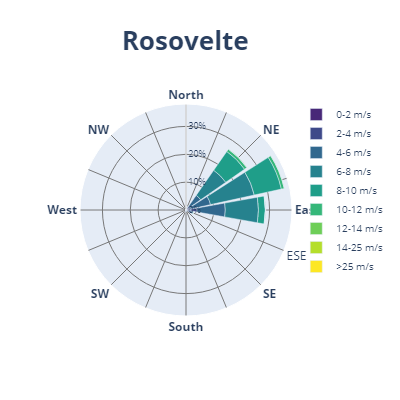

In [58]:
import pandas as pd
import numpy as np

df2 = pd.read_csv('data/78873000400.csv', parse_dates=["DATE"],index_col=["DATE"] )
df2[['Dir','DirQ', 'Obs', 'Speed','SpeedQ']] = df2['WND'].str.split(',', expand=True)
df2['Speed'] = df2['Speed'].astype(int) * .1 #add decimal back in
df2['Speed'] = df2['Speed'].astype(int)
df2['Dir'] = df2['Dir'].astype(int)
df2 = df2.drop(df2[(df2.Speed == 9999)].index)
df2 = df2.drop(df2[(df2.Dir == 999)].index)


def wind_dir_speed_freq(boundary_lower_speed, boundary_higher_speed, boundary_lower_direction,
                        boundary_higher_direction):
    # mask for wind speed column
    log_mask_speed = (wind_rose_data[:, 0] >= boundary_lower_speed) & (wind_rose_data[:, 0] < boundary_higher_speed)
    # mask for wind direction
    log_mask_direction = (wind_rose_data[:, 1] >= boundary_lower_direction) & (
                wind_rose_data[:, 1] < boundary_higher_direction)

    # application of the filter on the wind_rose_data array
    return wind_rose_data[log_mask_speed & log_mask_direction]


# Creating a pandas dataframe with 8 wind speed bins for each of the 16 wind directions.
# dataframe structure: direction | strength | frequency (radius)

wind_rose_df = pd.DataFrame(np.zeros((16 * 9, 3)), index=None, columns=('direction', 'strength', 'frequency'))

directions = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
directions_deg = np.array([0, 22.5, 45, 72.5, 90, 112.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5])
speed_bins = ['0-2 m/s', '2-4 m/s', '4-6 m/s', '6-8 m/s', '8-10 m/s', '10-12 m/s', '12-14 m/s', '14-25 m/s', '>25 m/s']

# filling in the dataframe with directions and speed bins
wind_rose_df.direction = directions * 9
wind_rose_df.strength = np.repeat(speed_bins, 16)

#creating a multiindex dataframe with frequencies

idx = pd.MultiIndex.from_product([speed_bins,
                                  directions_deg],
                                 names=['wind_speed_bins', 'wind_direction_bins'])
col = ['frequency']
frequencies_df = pd.DataFrame(0, idx, col)

wind_rose_data = df2[['Speed', 'Dir']].to_numpy()

# distance between the centre of the bin and its edge
step = 11.25

# converting data between 348.75 and 360 to negative
for i in range(len(wind_rose_data)):
    if directions_deg[-1] + step <= wind_rose_data[i, 1] and wind_rose_data[i, 1] < 360:
        wind_rose_data[i, 1] = wind_rose_data[i, 1] - 360

# determining the direction bins
bin_edges_dir = directions_deg - step
bin_edges_dir = np.append(bin_edges_dir, [directions_deg[-1] + step])

# determining speed bins ( the last bin is 50 as above those speeds the outliers were removed for the measurements)
threshold_outlier_rm = 50
bin_edges_speed = np.array([0, 2, 4, 6, 8, 10, 12, 14, 25, threshold_outlier_rm])

frequencies = np.array([])
# loop selecting given bins and calculating frequencies
for i in range(len(bin_edges_speed) - 1):
    for j in range(len(bin_edges_dir) - 1):
        bin_contents = wind_dir_speed_freq(bin_edges_speed[i], bin_edges_speed[i + 1], bin_edges_dir[j],
                                           bin_edges_dir[j + 1])

        # applying the filtering function for every bin and checking the number of measurements
        bin_size = len(bin_contents)
        frequency = bin_size / len(wind_rose_data)

        #obtaining the final frequencies of bin
        frequencies = np.append(frequencies, frequency)

# updating the frequencies dataframe
frequencies_df.frequency = frequencies * 100  # [%]
wind_rose_df.frequency = frequencies * 100  # [%]

# calling the PLOT function
"""
PLOTTING THE ROSES
"""
fig_wind_rose = wind_rose_fig(frequencies_df,
                              title='<b>Rosovelte</b>',
                              filename='roosevelt.svg',
                              open_bool=False)